In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import WordNetLemmatizer

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}


In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [2]:
# Read Dataset
df = pd.read_csv(r'C:\Users\Arun\Desktop\collected_data\indeed_job_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5715 non-null   int64  
 1   Job_Title                         5715 non-null   object 
 2   Link                              5715 non-null   object 
 3   Queried_Salary                    5715 non-null   object 
 4   Job_Type                          5715 non-null   object 
 5   Skill                             5483 non-null   object 
 6   No_of_Skills                      5715 non-null   int64  
 7   Company                           5611 non-null   object 
 8   No_of_Reviews                     4753 non-null   float64
 9   No_of_Stars                       4753 non-null   float64
 10  Date_Since_Posted                 5611 non-null   float64
 11  Description                       5413 non-null   object 
 12  Locati

In [3]:
# scaling down the dataset to the description and job title
col_names = ["Job_Title", "Description"]
df_data = df[col_names]
df_data.head()
df_data.to_csv('dataset.csv')

In [50]:
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')

        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')

        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)

        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text)

        # stripping first and last white space
        clean_text = clean_text.strip()

        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text)

        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')

        # using try and except due to Nan in the column
    except:
        clean_text = np.nan

    return clean_text

In [51]:
df_data["Description"] = df_data["Description"].apply(clean_text)
df_data.head()

C:\Users\Arun\AppData\Local\Temp\ipykernel_17424\3091690565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Description"] = df_data["Description"].apply(clean_text)


,Job_Title,Description
0,Data Scientist,"POSITION SUMMARY, The Business Analyst role is..."
1,Data Scientist,"What do we need?, You to have an amazing perso..."
2,Data Scientist,"Validate, analyze, and conduct statistical ana..."
3,Graduate Studies Program - Data Scientist,"Full time, Washington, DC metro area, Starting..."
4,Data Scientist I,Assist in consultations with business partners...


In [52]:
# Create dataframe and drop rows with null values
df_data = pd.DataFrame(df_data)
df_data.dropna(inplace = True)
df_data.reset_index(inplace = True, drop = True)

Tokenization

In [53]:
# create a temp column for lowercase description
df_data['lower_description'] = df_data.Description.str.lower()
df_data.head()

,Job_Title,Description,lower_description
0,Data Scientist,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is..."
1,Data Scientist,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso..."
2,Data Scientist,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana..."
3,Graduate Studies Program - Data Scientist,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting..."
4,Data Scientist I,Assist in consultations with business partners...,assist in consultations with business partners...


In [54]:
tokenizer = RegexpTokenizer(r"\w+")
df_data['word_tokenized'] = df_data.lower_description.apply(lambda row: tokenizer.tokenize(row))

In [55]:
df_data['sentence_tokenized'] = df_data.Description.apply(lambda row: sent_tokenize(row))

In [56]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Title           5413 non-null   object
 1   Description         5413 non-null   object
 2   lower_description   5413 non-null   object
 3   word_tokenized      5413 non-null   object
 4   sentence_tokenized  5413 non-null   object
dtypes: object(5)
memory usage: 211.6+ KB


In [57]:
df_data.head()

,Job_Title,Description,lower_description,word_tokenized,sentence_tokenized
0,Data Scientist,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","[position, summary, the, business, analyst, ro...","[POSITION SUMMARY, The Business Analyst role i..."
1,Data Scientist,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","[what, do, we, need, you, to, have, an, amazin...","[What do we need?, You to have an amazing pers..."
2,Data Scientist,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","[validate, analyze, and, conduct, statistical,...","[Validate, analyze, and conduct statistical an..."
3,Graduate Studies Program - Data Scientist,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","[full, time, washington, dc, metro, area, star...","[Full time, Washington, DC metro area, Startin..."
4,Data Scientist I,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...


Word Count

In [58]:
# obtains a word count for each individual job description
df_data['word_count'] = df_data.word_tokenized.str.len()

C:\Users\Arun\PycharmProjects\JDEngine\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


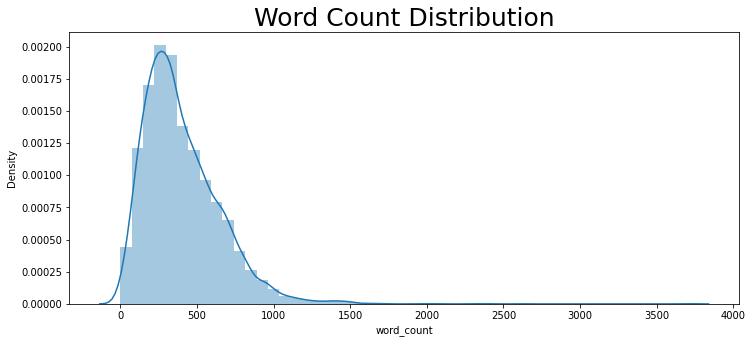

In [59]:
plt.figure(figsize = (12,5))
sns.distplot(df_data['word_count'])
plt.title('Word Count Distribution', size = 25);

C:\Users\Arun\PycharmProjects\JDEngine\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


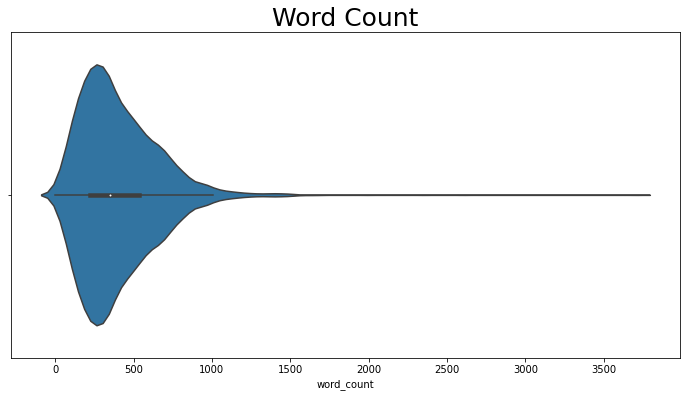

In [60]:
plt.figure(figsize = (12, 6));
sns.violinplot(df_data["word_count"])
plt.title('Word Count', size = 25);

Sentence Count

In [61]:
# obtains sentence count for each individual job description
df_data['sentence_count'] = df_data.sentence_tokenized.str.len()

C:\Users\Arun\PycharmProjects\JDEngine\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


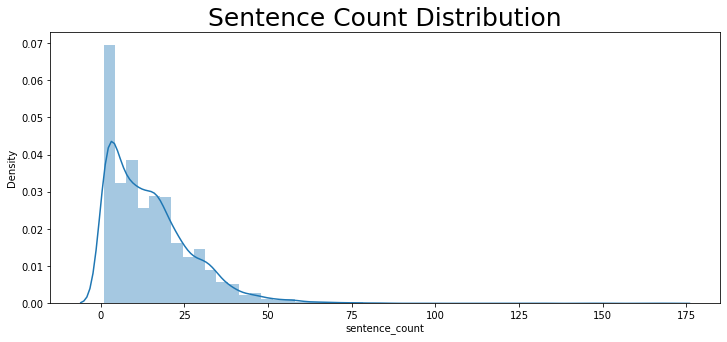

In [62]:
plt.figure(figsize = (12,5))
sns.distplot(df_data['sentence_count'])
plt.title('Sentence Count Distribution', size = 25);

In [63]:
df_data.describe()

,word_count,sentence_count
count,5413.000000,5413.000000
mean,400.587290,15.024386
std,249.264893,12.905971
min,0.000000,1.000000
25%,223.000000,5.000000
50%,347.000000,12.000000
75%,537.000000,21.000000
max,3704.000000,169.000000


Stop Words

In [64]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Title           5413 non-null   object
 1   Description         5413 non-null   object
 2   lower_description   5413 non-null   object
 3   word_tokenized      5413 non-null   object
 4   sentence_tokenized  5413 non-null   object
 5   word_count          5413 non-null   int64 
 6   sentence_count      5413 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 296.1+ KB


In [65]:
df_data.head()

,Job_Title,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count
0,Data Scientist,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","[position, summary, the, business, analyst, ro...","[POSITION SUMMARY, The Business Analyst role i...",424,25
1,Data Scientist,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","[what, do, we, need, you, to, have, an, amazin...","[What do we need?, You to have an amazing pers...",286,10
2,Data Scientist,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","[validate, analyze, and, conduct, statistical,...","[Validate, analyze, and conduct statistical an...",314,24
3,Graduate Studies Program - Data Scientist,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","[full, time, washington, dc, metro, area, star...","[Full time, Washington, DC metro area, Startin...",297,13
4,Data Scientist I,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...,316,7


In [66]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

In [67]:
df_data['clean_words'] = df_data.word_tokenized.apply(stopword_removal)

In [68]:
df_data.head()

,Job_Title,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words
0,Data Scientist,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","[position, summary, the, business, analyst, ro...","[POSITION SUMMARY, The Business Analyst role i...",424,25,"[position, summary, business, analyst, role, p..."
1,Data Scientist,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","[what, do, we, need, you, to, have, an, amazin...","[What do we need?, You to have an amazing pers...",286,10,"[need, amazing, personality, communication, st..."
2,Data Scientist,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","[validate, analyze, and, conduct, statistical,...","[Validate, analyze, and conduct statistical an...",314,24,"[validate, analyze, conduct, statistical, anal..."
3,Graduate Studies Program - Data Scientist,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","[full, time, washington, dc, metro, area, star...","[Full time, Washington, DC metro area, Startin...",297,13,"[full, time, washington, dc, metro, area, star..."
4,Data Scientist I,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...,316,7,"[assist, consultations, business, partners, in..."


Stemming

In [69]:
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

In [70]:
df_data['clean_stemmed'] = df_data.clean_words.apply(stemming)

In [71]:
df_data['clean_stemmed'].head()

0    [posit, summari, busi, analyst, role, primari,...
1    [need, amaz, person, commun, style, super, org...
2    [valid, analyz, conduct, statist, analysi, dat...
3    [full, time, washington, dc, metro, area, star...
4    [assist, consult, busi, partner, intern, exter...
Name: clean_stemmed, dtype: object

Lemmatization

In [72]:
def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [73]:
df_data['clean_lemmed'] = df_data.clean_words.apply(lemming)

In [74]:
df_data['clean_lemmed'].head()

0    [position, summary, business, analyst, role, p...
1    [need, amazing, personality, communication, st...
2    [validate, analyze, conduct, statistical, anal...
3    [full, time, washington, dc, metro, area, star...
4    [assist, consultation, business, partner, inte...
Name: clean_lemmed, dtype: object

In [75]:
df_data.to_csv('processed_data.csv')

In [30]:
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row

In [31]:
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [32]:
len(stem_corpus), len(lem_corpus)

(1490474, 1490474)

Frequent Words

Stemmed

In [33]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

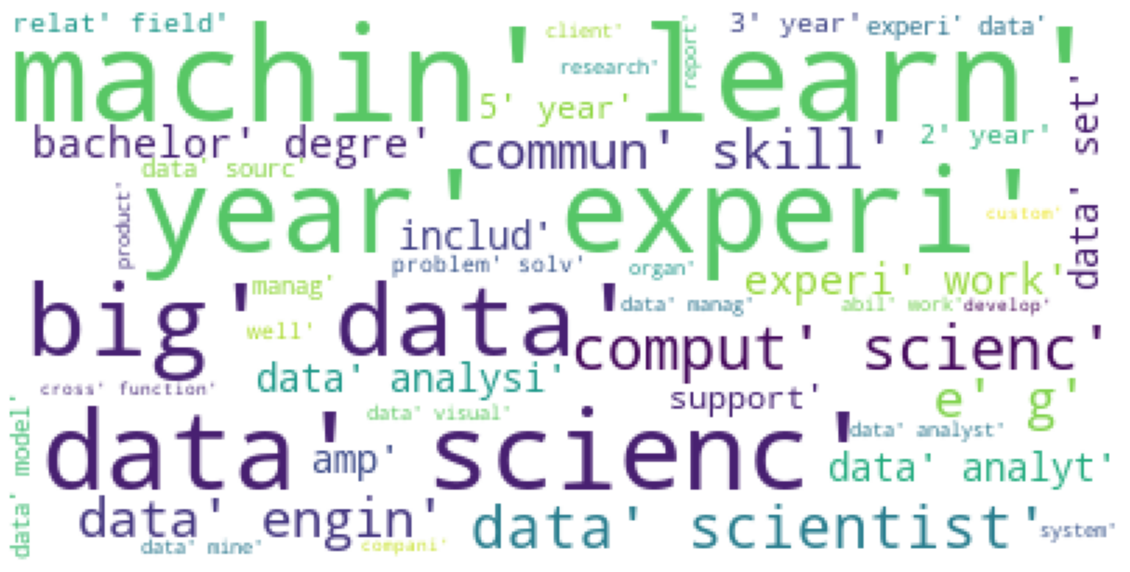

In [34]:
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [35]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]

In [36]:
top_stem.head()

,Word,Freq
0,data,53691
1,experi,28061
2,work,17209
3,develop,14530
4,busi,14217


In [37]:
top_stem.describe()

,Freq
count,14552.000000
mean,100.909841
std,737.090260
min,1.000000
25%,1.000000
50%,3.000000
75%,15.000000
max,53691.000000


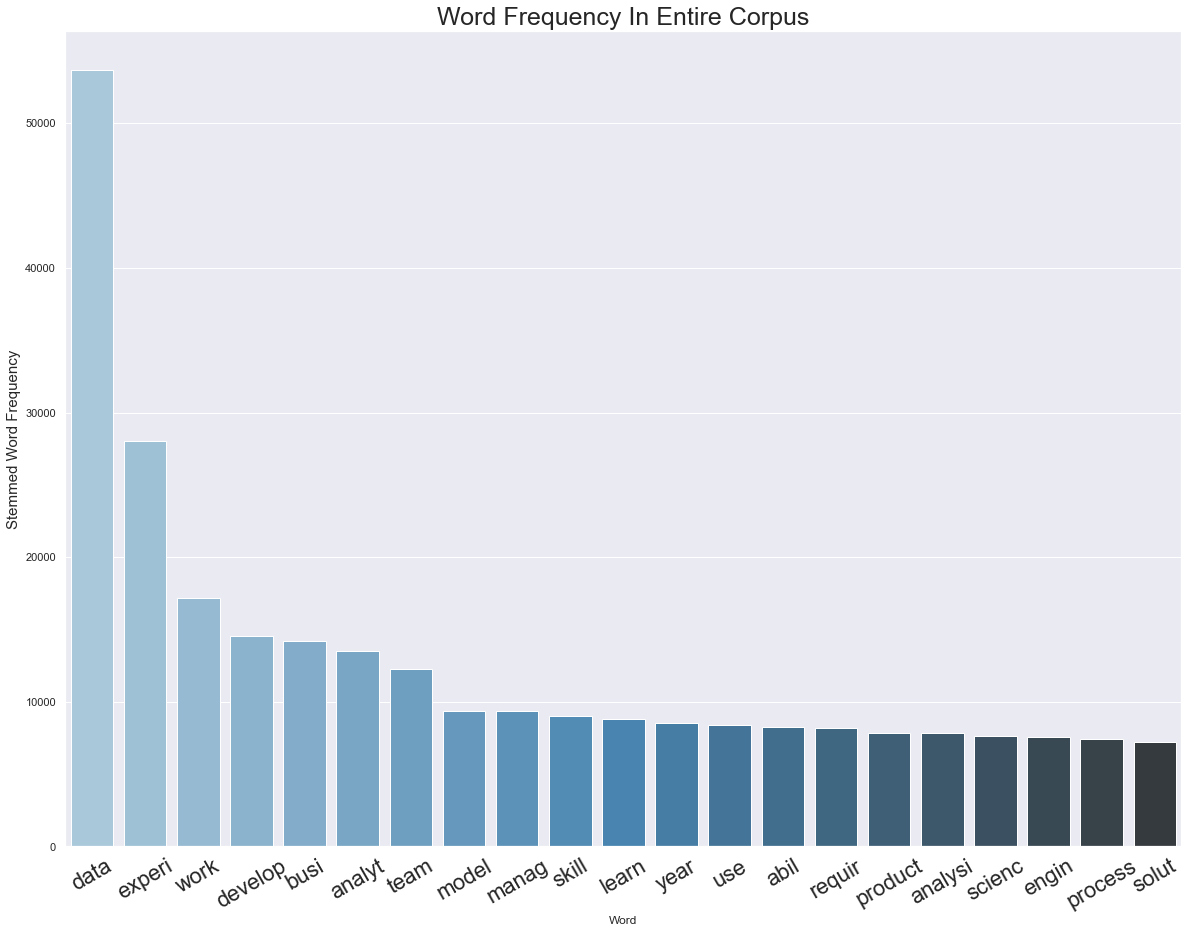

In [38]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,15)})
stem_bar = sns.barplot(x="Word", y="Freq", data=top_stem[:21], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Stemmed Word Frequency', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), rotation=30, fontsize = 22);

Lemmatized

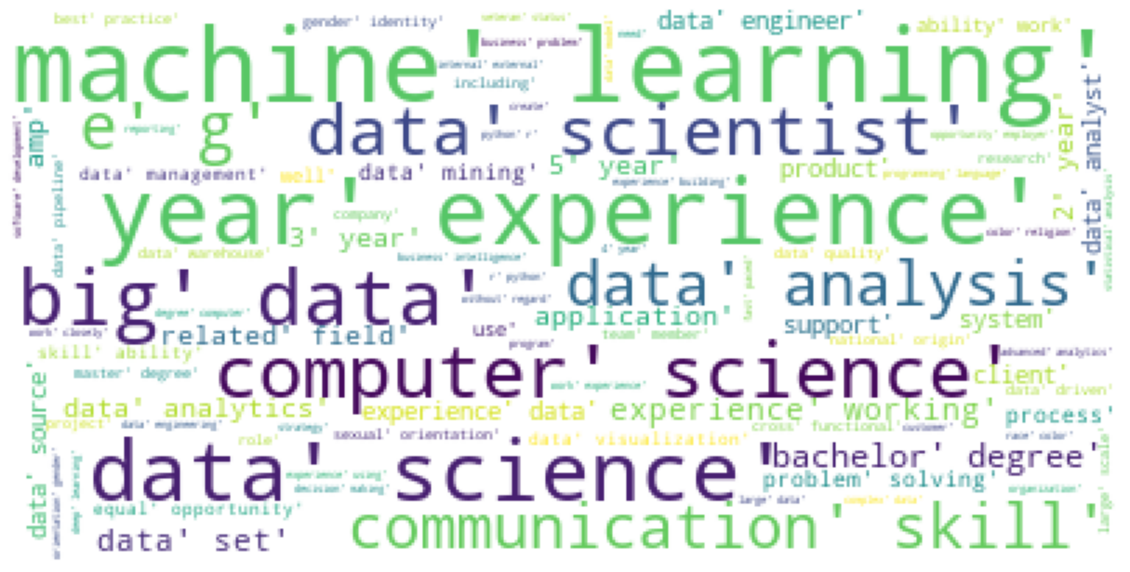

In [39]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');

In [40]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

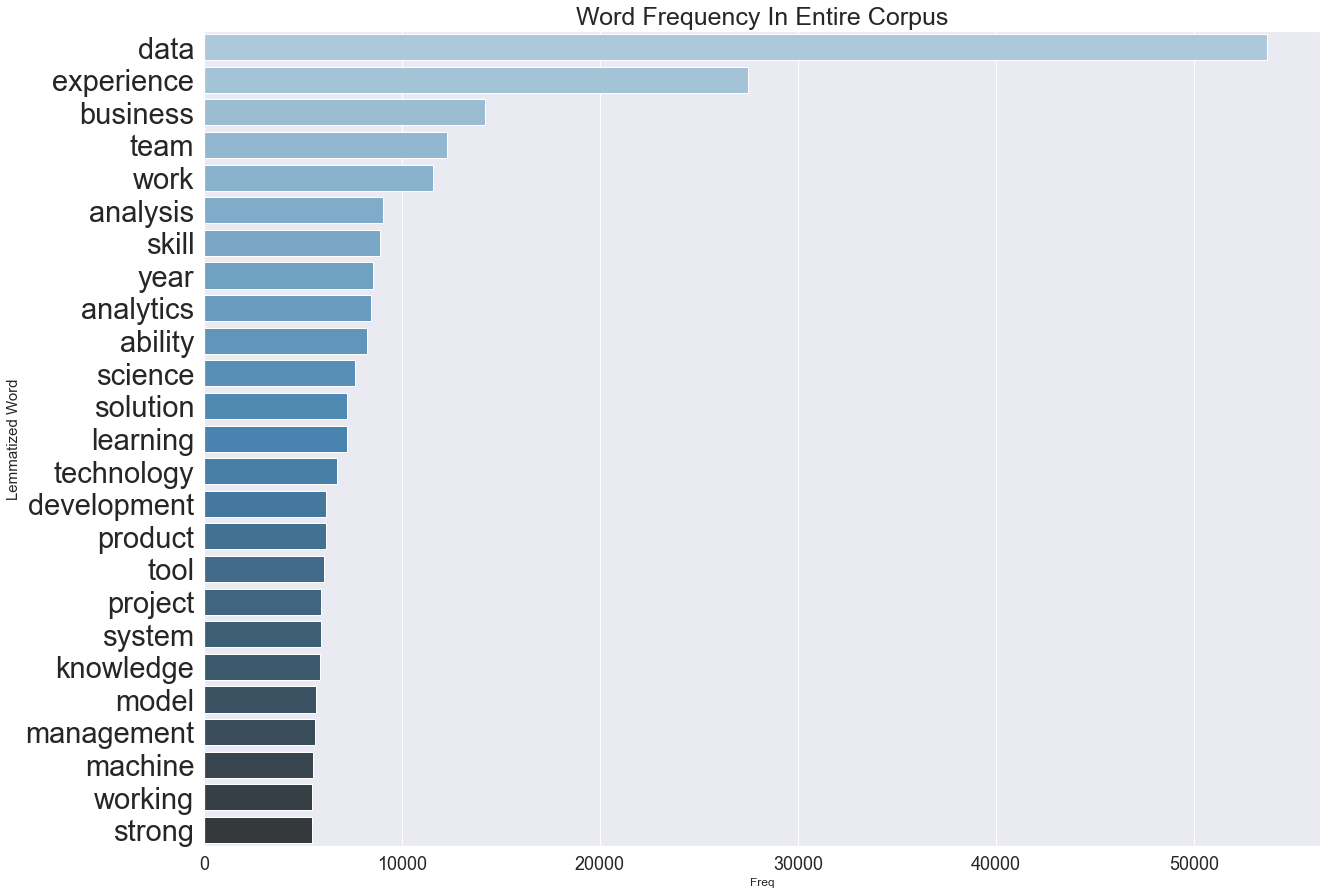

In [41]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:25], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 29);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)